In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/FinalProject/new_features/aligned.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Full Path,Application,Attribution,Network Conditions,min_packet_size,max_packet_size,mean_packet_size,small_packet_ratio,min_tls_record_size,max_tls_record_size,mean_tls_record_size,outgoing_tls_count,incoming_tls_count,min_iat,max_iat,mean_iat,outgoing_packet_count,incoming_packet_count,min_tcp_window_size,max_tcp_window_size,mean_tcp_window_size,raw_payload_size,byte_frequency_distribution,mean_clump_length,max_clump_length,mean_clump_size,max_clump_size,mean_clump_iat,max_clump_iat,asn_number,asn_description,asn_country_code,num_ip_addresses_in_response,min_ttl_value,max_ttl_value,mean_ttl_value,avg_domain_name_length,special_chars_in_domain_names,byte_frequency_distribution_first_packets
0,Data\browsing\1inch.io\corrupt --rate 5%\2024-...,1inch,browsing,corrupt --rate 5%,42,1506,738.856191,0.423100,22.0,16401.0,1466.307263,61.0,118.0,-0.000040,2.739341,0.003014,437.0,423.0,0.0,65535.0,1832.469767,496121.0,"[0.0056518470292529445, 0.004242916546568277, ...",51.238908,703.0,37858.184300,496906.0,0.154443,2.801072,NaN,423.0,NaN,27.0,52.0,300.0,198.900000,17.545455,77.0,NaN
1,Data\browsing\aboutads.info\drop --rate 10%\20...,aboutads,browsing,drop --rate 10%,42,1494,783.003755,0.411020,19.0,16401.0,702.305842,130.0,161.0,-0.000068,1.882935,0.001873,458.0,546.0,0.0,65535.0,1716.627490,82.0,"[0.005865679531019335, 0.004396266081866343, 0...",85.462687,1047.0,66917.604478,842055.0,0.160029,1.882935,15169.0,GOOGLE,Unknown,8.0,22.0,65335.0,6275.230769,20.222222,36.0,NaN
2,Data\browsing\alainelkanninterviews.com\duplic...,alainelkanninterviews,browsing,duplicate --rate 5%,42,1506,792.395219,0.406831,26.0,16401.0,1443.445428,122.0,217.0,-0.000042,2.667968,0.002063,1462.0,1941.0,0.0,65535.0,1162.749633,39.0,"[0.004611361955801973, 0.0040541522202939394, ...",87.840000,1486.0,69603.996000,1133284.0,0.181208,2.667968,15169.0,GOOGLE,Unknown,13.0,33.0,86400.0,13393.000000,22.416667,48.0,NaN
3,Data\browsing\algemeiner.com\corrupt --rate 5%...,algemeiner,browsing,corrupt --rate 5%,42,1506,414.132597,0.563393,18.0,63577.0,661.495478,1222.0,3864.0,-0.000084,5.961321,0.004657,9651.0,9835.0,0.0,65535.0,6547.832341,1644.0,"[0.01107407170476733, 0.006259544040860814, 0....",11.842675,728.0,4904.437561,535625.0,0.055154,6.189823,29990.0,ASN-APPNEX,Unknown,221.0,0.0,11244.0,1273.053333,18.847319,858.0,NaN
4,Data\browsing\algemeiner.com\delay --time 200m...,algemeiner,browsing,delay --time 200ms,54,1506,527.129519,0.500219,1.0,28998.0,634.409767,1402.0,3574.0,-0.000027,2.291642,0.003355,8325.0,8743.0,0.0,65535.0,6401.876377,6572084.0,"[0.00960836775671157, 0.005790857207546343, 0....",17.444374,1002.0,9195.444374,790569.0,0.058522,2.291642,16509.0,AMAZON-02,Unknown,201.0,1.0,9750.0,770.593496,18.126797,765.0,NaN


In [ ]:
domain_counts = df['Application'].value_counts()
valid_domains = domain_counts[domain_counts >= 20].index
df = df[df['Application'].isin(valid_domains)]

df.drop(columns=['asn_country_code'], inplace=True)

In [ ]:
# Display basic information about the dataset
print("Dataframe Info:")
df.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Display the first few rows to get an overview of the data
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6556 entries, 0 to 7221
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Full Path                                  6556 non-null   object 
 1   Application                                6556 non-null   object 
 2   Attribution                                6556 non-null   object 
 3   Network Conditions                         6556 non-null   object 
 4   min_packet_size                            6556 non-null   int64  
 5   max_packet_size                            6556 non-null   int64  
 6   mean_packet_size                           6556 non-null   float64
 7   small_packet_ratio                         6556 non-null   float64
 8   min_tls_record_size                        6555 non-null   float64
 9   max_tls_record_size                        6555 non-null   float64
 10  mean_tls_reco

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Handle list-like or string-based data
df['byte_frequency_distribution'] = df['byte_frequency_distribution'].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) and x != '[]' else 0)
df['byte_frequency_distribution_first_packets'] = df['byte_frequency_distribution_first_packets'].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) and x != '[]' else 0)
df['incoming_packet_count'] = df['incoming_packet_count'].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) and x.startswith('[') else x)
df['num_ip_addresses_in_response'] = df['num_ip_addresses_in_response'].apply(lambda x: np.mean(eval(x)) if isinstance(x, str) and x.startswith('[') else x)


# Replace missing or 'Unknown' values with NaN and fill them appropriately
df.replace('Unknown', np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Label Encoding for categorical data
le = LabelEncoder()
df['Application'] = le.fit_transform(df['Application'])
df['Attribution'] = le.fit_transform(df['Attribution'])
df['Network Conditions'] = le.fit_transform(df['Network Conditions'])

# apply Label Encoding or fill missing values for ASN-related features
df['asn_description'] = df['asn_description'].fillna('Unknown')
df['asn_description'] = df['asn_description'].astype(str)
df['asn_description'] = le.fit_transform(df['asn_description'])

# Drop unnecessary columns like Full Path
X = df.drop(columns=['Full Path', 'Application', 'Attribution', 'Network Conditions'])
y_application = df['Application']

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 Accuracy  Precision    Recall  F1 Score
All Features     0.933910   0.933602  0.933910  0.931711
Top 10 Features  0.907473   0.909403  0.907473  0.904355
Top 15 Features  0.912557   0.914473  0.912557  0.909740
Top 20 Features  0.925775   0.926936  0.925775  0.923325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

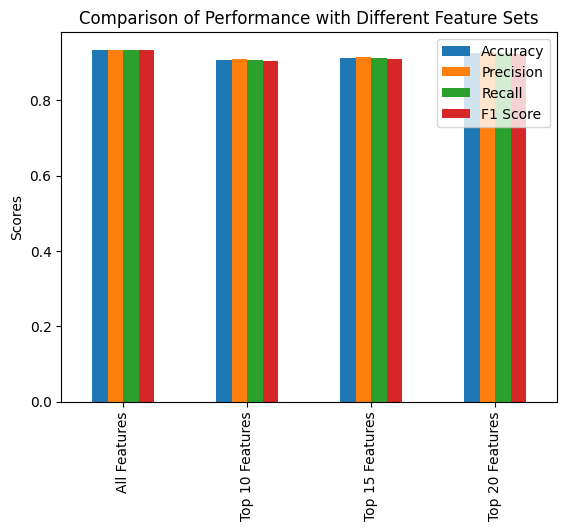

In [ ]:
# Function to evaluate model performance
def evaluate_model(features):
    X_subset = X[features]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_application, test_size=0.3, random_state=42)

    clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Train the Random Forest Classifier on all features
clf_all = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y_application, test_size=0.3, random_state=42)
clf_all.fit(X_train, y_train)

# Feature importance extraction
importances = clf_all.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Different subsets of features
top_10_features = feature_importance_df['Feature'].head(10).tolist()
top_15_features = feature_importance_df['Feature'].head(15).tolist()
top_20_features = feature_importance_df['Feature'].head(20).tolist()

results = {}

# Evaluate performance with different feature sets
all_features = feature_importance_df['Feature'].tolist()
results['All Features'] = evaluate_model(all_features)
results['Top 10 Features'] = evaluate_model(top_10_features)
results['Top 15 Features'] = evaluate_model(top_15_features)
results['Top 20 Features'] = evaluate_model(top_20_features)

# Comparison of results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(results_df)

# Visualization (optional)
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', title='Comparison of Performance with Different Feature Sets')
plt.ylabel('Scores')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

                              Accuracy  Precision    Recall  F1 Score
Logistic Regression           0.431622   0.368676  0.431622  0.373976
Support Vector Machine (SVM)  0.153025   0.073231  0.153025  0.072622
K-Nearest Neighbors (KNN)     0.466192   0.460511  0.466192  0.452815
Gradient Boosting             0.880529   0.883555  0.880529  0.876737
Naive Bayes                   0.638027   0.684822  0.638027  0.623201
Decision Tree                 0.833757   0.838922  0.833757  0.832431
Random Forest                 0.930351   0.931914  0.930351  0.927056
Multilayer Perceptron (MLP)   0.600915   0.642045  0.600915  0.582400


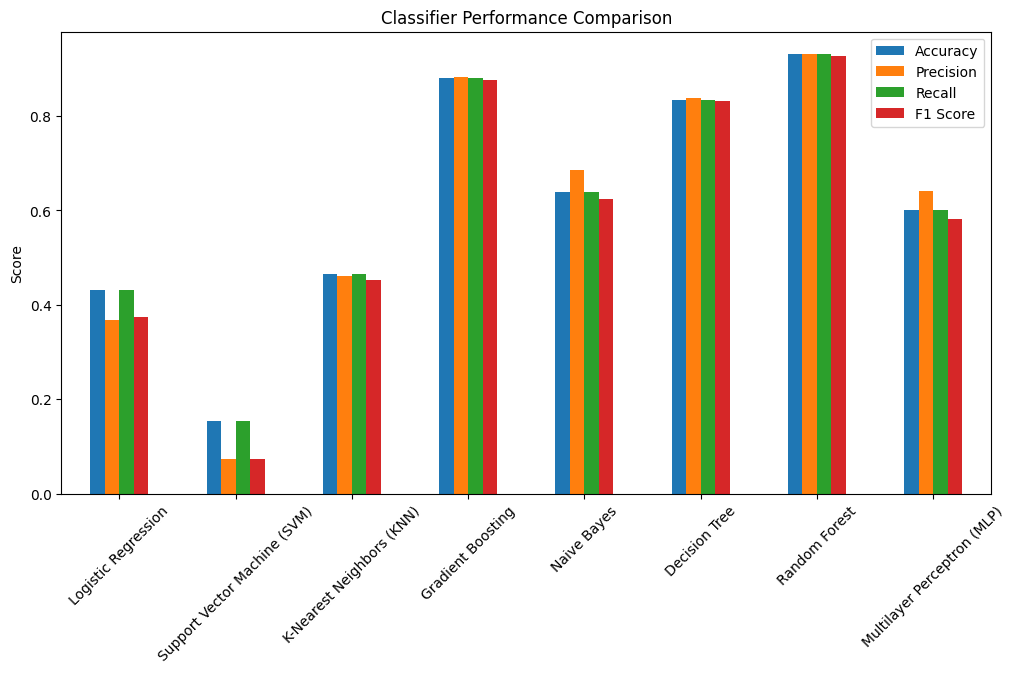

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1


X = df[all_features]
y = df['Application']

# imputer the missing values with mean
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_application, test_size=0.3, random_state=42)

# Classifiers to test with
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine (SVM)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Multilayer Perceptron (MLP)': MLPClassifier(max_iter=1000)
}

# A dictionary for the results
results = {}

# Iterate over classifiers and evaluate
for name, clf in classifiers.items():
    accuracy, precision, recall, f1 = evaluate_model(clf, X_train, X_test, y_train, y_test)
    results[name] = [accuracy, precision, recall, f1]

# Convert results to a DataFrame
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(results_df)

# Plot the performance comparison
results_df.plot(kind='bar', figsize=(12, 6), title="Classifier Performance Comparison", ylabel="Score")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

                              Accuracy  Precision    Recall  F1 Score
Logistic Regression           0.835282   0.801557  0.835282  0.797640
Support Vector Machine (SVM)  0.743264   0.635464  0.743264  0.642858
K-Nearest Neighbors (KNN)     0.851042   0.839248  0.851042  0.841405
Gradient Boosting             0.990341   0.990372  0.990341  0.990308
Naive Bayes                   0.264362   0.743221  0.264362  0.210617
Decision Tree                 0.967972   0.969084  0.967972  0.968362
Random Forest                 0.988307   0.988357  0.988307  0.988240
Multilayer Perceptron (MLP)   0.910524   0.920204  0.910524  0.913058


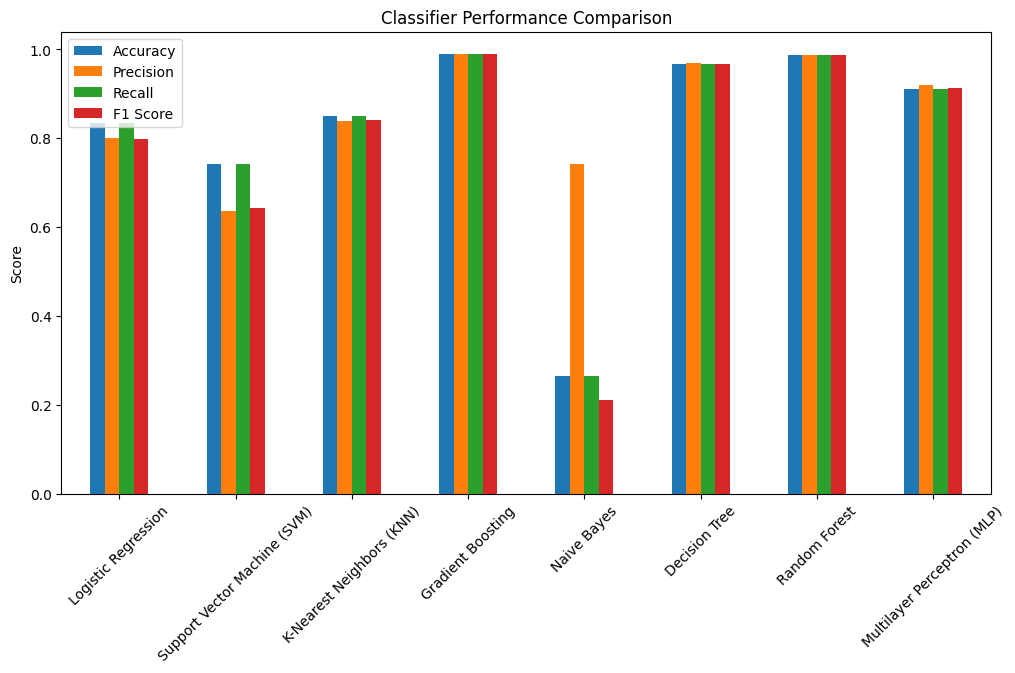

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1


X = df[all_features]
y = df['Attribution']

# imputer the missing values with mean
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Classifiers to test with
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine (SVM)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Multilayer Perceptron (MLP)': MLPClassifier(max_iter=1000)
}

# A dictionary for the results
results = {}

# Iterate over classifiers and evaluate
for name, clf in classifiers.items():
    accuracy, precision, recall, f1 = evaluate_model(clf, X_train, X_test, y_train, y_test)
    results[name] = [accuracy, precision, recall, f1]

# Convert results to a DataFrame
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(results_df)

# Plot the performance comparison
results_df.plot(kind='bar', figsize=(12, 6), title="Classifier Performance Comparison", ylabel="Score")
plt.xticks(rotation=45)
plt.show()